# PyTorch

PyTorch is a deep learning framework developed by Facebook's AI Research Group.

## Tensors
A tensor is a generalization of vectors and matrices and is easily understood as a multidimensional array.

In [ ]:
import torch

### zeros()

In [11]:
w = torch.zeros(4,3)
w

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [12]:
w.shape

torch.Size([4, 3])

### randn() and randn_like()

In [16]:
# create a tensor from a normal distribution (mean=0, std=1)
w = torch.randn(4,3) 
w

tensor([[-0.1878,  0.6123,  0.5717],
        [-1.6159, -0.6082,  0.5684],
        [ 1.1030, -0.1915, -0.3217],
        [-1.6151,  0.4028,  1.4529]])

In [17]:
# create a tensor from a normal distribution with the size of another tensor
t = torch.randn_like(w)
t

tensor([[-1.8912,  0.8942, -0.5595],
        [ 0.6670, -0.2391,  1.1755],
        [-0.3609,  0.0833,  1.0462],
        [-0.5692,  1.6452,  0.0912]])

### fill()

Functions with `_` at the end are in-place functions. 

In [19]:
w.fill_(1)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

### view()
Reshaping a tensor

In [20]:
w

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [22]:
t = w.view(3,4)
t

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [23]:
w.view(3,-1) # the second dimention is left for the function to figure out

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

### numpy
Convert from tensor to numpy array
If torch tensor is on CPU, then they will share the locations which would mean that changing one would change the other

In [24]:
w.numpy()

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

## Loss  (Criterion)
Takes in what the model predicts and correct label and computes how far the prediction is.
Loss function for problem types:

| problem type | last-layer activation | loss function |
| :---: | :---: | :---: |
| binary classification | sigmoid | binary crossentropy |
| multiclass, single label classification | softmax | categorical crossentropy |
| multiclass, multilabel classification | sigmoid | binary crossentropy |
| regression to arbitrary values | none | MSE |
| regression to values between 0 and 1 | sigmoid | MSE or binary crossentropy |

Adjusting weights to minimize the loss using Gradient Descent.


## EXAMPLE: Fashion MNIST and NNs

* 70000 images (60000 for training and 10000 for testing)
* 28 x 28 pixels
* 10 categories (levels 0 - 9)

In [1]:
# Setting seeds ensure we have the same results - this is not guaranteed across PyTorch releases though
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import numpy as np
np.random.seed(0)

In [2]:
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch import nn

mean, std = (0.5,), (0.5,)

# Create a transform and normalise data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                              ])

# Download FMNIST training dataset and load TRAINING data
trainset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download FMNIST test dataset and load TEST data
testset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting C:\Users\anast/.pytorch/FMNIST/FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\anast/.pytorch/FMNIST/FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting C:\Users\anast/.pytorch/FMNIST/FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\anast/.pytorch/FMNIST/FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting C:\Users\anast/.pytorch/FMNIST/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\anast/.pytorch/FMNIST/FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting C:\Users\anast/.pytorch/FMNIST/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\anast/.pytorch/FMNIST/FashionMNIST\raw

Processing...


C:\Users\anast\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [8]:
# Creating  `FMNIST` class from inhereting attributes and methods from a superclass
# `FMNIST` is a derived or a subclass of `nn.Module`
class FMNIST(nn.Module):
  def __init__(self):
    #Inititalize the data with `__init__()` that specifies how to initialize the data  
    #Object is passed to the first argument `self`
    super().__init__() 
    self.fc1 = nn.Linear(784, 128) # 784 -> 128
    self.fc2 = nn.Linear(128,64) # 128 -> 64
    self.fc3 = nn.Linear(64,10) # 64 -> 10


#`forward` defines the order of different layers of NN
#`F` has the functions implemented
  def forward(self, x):
    x = x.view(x.shape[0], -1)
    #Declare the layers
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1) # loss function
    
    return x

model = FMNIST()

In [4]:
# Training the network
# Steps:
# 1. take a batch of images and targets
# 2. forward pass - run them through NN
# 3. calculate loss of NN on batch by measuring the mismatch 
# 4. update the weights of NN

from torch import optim

criterion = nn.NLLLoss() # defnining loss function 
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 3 # can increase it but be aware of overfitting and time requirements

for i in range(num_epochs):
    cum_loss = 0 # track of loss for each batch

    for images, labels in trainloader: # 1. take a batch
        optimizer.zero_grad() # zero out gradients
        output = model(images) # 2. forward pass
        loss = criterion(output, labels) # 3. calculate loss
        loss.backward() 
        optimizer.step() # update the weights
        
        cum_loss += loss.item()
     
    print(f"Training loss: {cum_loss/len(trainloader)}") # print at the end of each epoch

Training loss: 1.0338174501843036
Training loss: 0.5608082033360182
Training loss: 0.4914347628699437


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

images, labels = next(iter(testloader))

test_image_id = 13
img = images[test_image_id].view(1, 784) 

with torch.no_grad():
    logps = model(img)

Matplotlib is building the font cache; this may take a moment.


<BarContainer object of 10 artists>

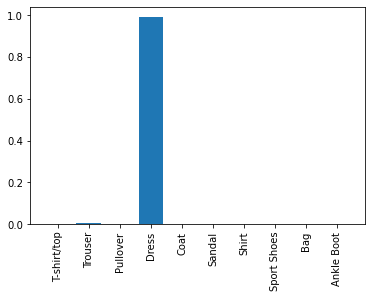

In [6]:
ps = torch.exp(logps)
nps = ps.numpy()[0]
FMNIST_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sport Shoes','Bag','Ankle Boot']
plt.xticks(np.arange(10),labels=FMNIST_labels,rotation='vertical')
plt.bar(np.arange(10), nps)

In [67]:
def denormalize(tensor):
  tensor = tensor*0.5 + 0.5
  return tensor
  
img = img.view(28,-1)
img = denormalize(img)
plt.imshow(img,cmap='gray')

NameError: name 'img' is not defined

## Autograd
Used to automatically calculate the gradients of tensors.
Forward pass: calculate the loss
Backward pass: calculate the gradient of the loss with respect to each of the weights

In [1]:
# Setting seeds to try and ensure we have the same results - this is not guaranteed across PyTorch releases.
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import numpy as np
np.random.seed(0)

In [2]:
import torch
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch import nn

mean, std = (0.5,), (0.5,)

# Create a transform and normalise data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                              ])

# Download FMNIST training dataset and load training data
trainset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download FMNIST test dataset and load test data
testset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [3]:
class FMNIST(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,10)
    
  def forward(self, x):
    x = x.view(x.shape[0], -1)
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    
    return x
    
#model = FMNIST()   

In [4]:
# another way to define the network to be able to see the weights (class defining method does not support this)
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

In [6]:
model[1]

ReLU()

In [7]:
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

In [8]:
criterion = nn.NLLLoss()

In [10]:
# forward pass is done, weights are calculated
print('Initial Weights :', model[0].weight)

Initial Weights : Parameter containing:
tensor([[-0.0003,  0.0192, -0.0294,  ...,  0.0219,  0.0037,  0.0021],
        [-0.0198, -0.0150, -0.0104,  ..., -0.0203, -0.0060, -0.0299],
        [-0.0201,  0.0149, -0.0333,  ..., -0.0203,  0.0012,  0.0080],
        ...,
        [ 0.0018, -0.0295,  0.0085,  ..., -0.0037,  0.0036,  0.0300],
        [-0.0233, -0.0220, -0.0064,  ...,  0.0115, -0.0324, -0.0158],
        [ 0.0309,  0.0066,  0.0125,  ...,  0.0286,  0.0350, -0.0105]],
       requires_grad=True)


In [12]:
# have not done the backwards pass yet, so there should be no gradients
print('Initial Weights gradients :', model[0].weight.grad)

Initial Weights gradients : None


In [13]:
# forwads pass, calculate the loss, and then do a backward pass
# weights are the same, gradients are calculated by autograd
# activation function does not have any weights, it's role is to add non-linearity to NN
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Initial weights : ',model[0].weight)
print('Initial weights gradient : ',model[0].weight.grad)
    

Initial weights :  Parameter containing:
tensor([[-0.0003,  0.0192, -0.0294,  ...,  0.0219,  0.0037,  0.0021],
        [-0.0198, -0.0150, -0.0104,  ..., -0.0203, -0.0060, -0.0299],
        [-0.0201,  0.0149, -0.0333,  ..., -0.0203,  0.0012,  0.0080],
        ...,
        [ 0.0018, -0.0295,  0.0085,  ..., -0.0037,  0.0036,  0.0300],
        [-0.0233, -0.0220, -0.0064,  ...,  0.0115, -0.0324, -0.0158],
        [ 0.0309,  0.0066,  0.0125,  ...,  0.0286,  0.0350, -0.0105]],
       requires_grad=True)
Initial weights gradient :  tensor([[-7.2154e-04, -7.2154e-04, -7.2154e-04,  ..., -7.1856e-04,
         -7.2154e-04, -7.2154e-04],
        [ 1.5117e-03,  1.5168e-03,  1.5292e-03,  ...,  1.5526e-03,
          1.5154e-03,  1.5168e-03],
        [-4.5585e-04, -4.5585e-04, -4.5585e-04,  ..., -4.5585e-04,
         -4.5585e-04, -4.5585e-04],
        ...,
        [-9.6583e-05, -9.6583e-05, -9.6583e-05,  ..., -1.5217e-04,
         -9.6583e-05, -9.6583e-05],
        [-5.6446e-04, -5.6559e-04, -5.5394e-0

In [14]:
model[2].weight

Parameter containing:
tensor([[-0.0825, -0.0339,  0.0713,  ..., -0.0854,  0.0097, -0.0645],
        [ 0.0488,  0.0832,  0.0728,  ..., -0.0440,  0.0541,  0.0612],
        [-0.0055, -0.0093, -0.0157,  ...,  0.0782,  0.0032, -0.0530],
        ...,
        [ 0.0009,  0.0023, -0.0776,  ...,  0.0575,  0.0759,  0.0016],
        [-0.0815, -0.0214, -0.0414,  ...,  0.0702, -0.0252,  0.0703],
        [-0.0815,  0.0329, -0.0134,  ...,  0.0773,  0.0774,  0.0468]],
       requires_grad=True)

In [15]:
model[2].weight.grad

tensor([[ 2.9982e-04,  7.5449e-04, -3.4903e-04,  ..., -4.0108e-03,
         -4.7830e-04,  1.6829e-03],
        [-3.7763e-03, -7.4046e-03, -1.6994e-03,  ...,  4.3599e-03,
         -2.2660e-03, -6.2232e-03],
        [ 0.0000e+00,  3.7159e-04,  2.0443e-05,  ..., -7.8269e-05,
          0.0000e+00, -1.6872e-04],
        ...,
        [ 1.0783e-04,  5.2203e-03,  1.4267e-03,  ...,  5.2378e-04,
         -1.5976e-03, -1.1809e-03],
        [ 2.2829e-03,  5.4146e-03,  4.5451e-04,  ..., -1.0207e-02,
         -2.3595e-03,  2.7769e-03],
        [-3.4852e-03, -5.0445e-03, -1.5482e-03,  ...,  1.0569e-02,
          2.0605e-03, -3.6040e-03]])

## Autograd with Tensors
Again, autotograd used for automatically calculating the gradients of tensors.
It works by keeping track of operations performed on tensors, and then goes back and calculates gradients on them.
You need to set `requires_grad=True`

In [40]:
w = torch.randn(4,3,requires_grad=True)
# can also set it after the tensor is created

In [41]:
y = torch.exp(w)
y

tensor([[0.8374, 4.4017, 0.0434],
        [2.6044, 1.4517, 2.3675],
        [6.8272, 1.0815, 0.8180],
        [0.8387, 0.4668, 0.4391]], grad_fn=<ExpBackward>)

In [42]:
# autograd module keeps track of the operations
y.grad_fn

In [43]:
outp = y.mean()
outp

tensor(1.8481, grad_fn=<MeanBackward0>)

In [44]:
# haven't run the backward funciton yet, so gradients are not calculated yet
print(w.grad)

None


In [45]:
# calculates the gradients of `outp` with respect to `w`
outp.backward()

In [46]:
w.grad

tensor([[0.0698, 0.3668, 0.0036],
        [0.2170, 0.1210, 0.1973],
        [0.5689, 0.0901, 0.0682],
        [0.0699, 0.0389, 0.0366]])

In [47]:
# call the method `detach()` to detach from computation history
w.detach()

tensor([[-0.1774,  1.4820, -3.1377],
        [ 0.9572,  0.3727,  0.8618],
        [ 1.9209,  0.0783, -0.2009],
        [-0.1760, -0.7618, -0.8230]])

In [48]:
# if you don't need gradients to be calculated
print(outp.requires_grad)

with torch.no_grad():
    outp = (w+y).mean()
    
print(outp.requires_grad)

True
False


## Optimizers
Determine how the network weights will be updated based on the loss function.
In other words, optimizer uses loss function to update the weights by implementing a variant of Stochastic Gradient Descent.

Training steps:
* take a batch of samples and targets
* forward pass
* calculating loss (the difference between the predicted values and the target)
* backward pass (compute the gradient of the loss with regard to the network's parameters)
* reduce the loss by taking the step of the optimizer by taking the previous step of the parameter, subtracting the learning rate multiplied by the gradient of loss

Important to remember to **zero out the gradients for each epoch** with `optimizer.zero_grad()` because they are relevant for a particular batch of data. 

In [50]:
# Setting seeds to try and ensure we have the same results - this is not guaranteed across PyTorch releases.
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import numpy as np
np.random.seed(0)

In [51]:
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch import nn

mean, std = (0.5,), (0.5,)

# Create a transform and normalise data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                              ])

# Download FMNIST training dataset and load training data
trainset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download FMNIST test dataset and load test data
testset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [52]:
class FMNIST(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,10)
    
  def forward(self, x):
    x = x.view(x.shape[0], -1)
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    
    return x
    
#model = FMNIST()   

In [53]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

In [54]:
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

In [55]:
from torch import optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01) # lr = learning rate


In [58]:
output = model(images) # forward pass
loss = criterion(output, labels) # calculate loss
loss.backward() # backward pass
print('Initial weights : ',model[0].weight)
print('Initial weights gradient : ',model[0].weight.grad)

Initial weights :  Parameter containing:
tensor([[-0.0003,  0.0192, -0.0294,  ...,  0.0219,  0.0037,  0.0021],
        [-0.0198, -0.0150, -0.0104,  ..., -0.0203, -0.0060, -0.0299],
        [-0.0201,  0.0149, -0.0333,  ..., -0.0203,  0.0012,  0.0080],
        ...,
        [ 0.0018, -0.0295,  0.0085,  ..., -0.0037,  0.0036,  0.0300],
        [-0.0233, -0.0220, -0.0064,  ...,  0.0115, -0.0324, -0.0158],
        [ 0.0309,  0.0066,  0.0125,  ...,  0.0286,  0.0350, -0.0105]],
       requires_grad=True)
Initial weights gradient :  tensor([[-0.0022, -0.0022, -0.0022,  ..., -0.0022, -0.0022, -0.0022],
        [ 0.0045,  0.0046,  0.0046,  ...,  0.0047,  0.0045,  0.0046],
        [-0.0014, -0.0014, -0.0014,  ..., -0.0014, -0.0014, -0.0014],
        ...,
        [-0.0003, -0.0003, -0.0003,  ..., -0.0005, -0.0003, -0.0003],
        [-0.0017, -0.0017, -0.0017,  ..., -0.0015, -0.0017, -0.0017],
        [ 0.0113,  0.0113,  0.0112,  ...,  0.0113,  0.0113,  0.0113]])


In [60]:
# update the weights using the step function of the optimizer
optimizer.step()

In [61]:
print('Initial weights : ',model[0].weight)
print('Initial weights gradient : ',model[0].weight.grad)

Initial weights :  Parameter containing:
tensor([[-0.0002,  0.0192, -0.0294,  ...,  0.0220,  0.0038,  0.0021],
        [-0.0198, -0.0150, -0.0105,  ..., -0.0203, -0.0060, -0.0300],
        [-0.0201,  0.0149, -0.0333,  ..., -0.0203,  0.0012,  0.0080],
        ...,
        [ 0.0018, -0.0295,  0.0085,  ..., -0.0037,  0.0036,  0.0300],
        [-0.0232, -0.0220, -0.0064,  ...,  0.0115, -0.0323, -0.0158],
        [ 0.0308,  0.0065,  0.0124,  ...,  0.0284,  0.0349, -0.0106]],
       requires_grad=True)
Initial weights gradient :  tensor([[-0.0022, -0.0022, -0.0022,  ..., -0.0022, -0.0022, -0.0022],
        [ 0.0045,  0.0046,  0.0046,  ...,  0.0047,  0.0045,  0.0046],
        [-0.0014, -0.0014, -0.0014,  ..., -0.0014, -0.0014, -0.0014],
        ...,
        [-0.0003, -0.0003, -0.0003,  ..., -0.0005, -0.0003, -0.0003],
        [-0.0017, -0.0017, -0.0017,  ..., -0.0015, -0.0017, -0.0017],
        [ 0.0113,  0.0113,  0.0112,  ...,  0.0113,  0.0113,  0.0113]])


In [62]:
# do not want to accumulate the gradients - MUST zero them out
optimizer.zero_grad()

In [64]:
print('Initial weights : ',model[0].weight) 
print('Initial weights gradient : ',model[0].weight.grad) # zeroed out

Initial weights :  Parameter containing:
tensor([[-0.0002,  0.0192, -0.0294,  ...,  0.0220,  0.0038,  0.0021],
        [-0.0198, -0.0150, -0.0105,  ..., -0.0203, -0.0060, -0.0300],
        [-0.0201,  0.0149, -0.0333,  ..., -0.0203,  0.0012,  0.0080],
        ...,
        [ 0.0018, -0.0295,  0.0085,  ..., -0.0037,  0.0036,  0.0300],
        [-0.0232, -0.0220, -0.0064,  ...,  0.0115, -0.0323, -0.0158],
        [ 0.0308,  0.0065,  0.0124,  ...,  0.0284,  0.0349, -0.0106]],
       requires_grad=True)
Initial weights gradient :  tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [66]:
# let's go through it sequentially to see each batch 
model = FMNIST() # instantiate the class
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 1 # change 

for i in range(num_epochs):
    cum_loss = 0
    batch_num = 0

    for batch_num, (images, labels) in enumerate(trainloader,1):
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        cum_loss += loss.item()
        print(f'Batch : {batch_num}, Loss: {loss.item()}')
       
     
    print(f"Training loss: {cum_loss/len(trainloader)}")

Batch : 1, Loss: 2.288628578186035
Batch : 2, Loss: 2.3080620765686035
Batch : 3, Loss: 2.3098013401031494
Batch : 4, Loss: 2.284043312072754
Batch : 5, Loss: 2.291738986968994
Batch : 6, Loss: 2.3061680793762207
Batch : 7, Loss: 2.2870423793792725
Batch : 8, Loss: 2.276984453201294
Batch : 9, Loss: 2.2776780128479004
Batch : 10, Loss: 2.3024075031280518
Batch : 11, Loss: 2.270155906677246
Batch : 12, Loss: 2.288559913635254
Batch : 13, Loss: 2.2820968627929688
Batch : 14, Loss: 2.2649171352386475
Batch : 15, Loss: 2.274873971939087
Batch : 16, Loss: 2.2665631771087646
Batch : 17, Loss: 2.2486894130706787
Batch : 18, Loss: 2.25093150138855
Batch : 19, Loss: 2.2826104164123535
Batch : 20, Loss: 2.2532405853271484
Batch : 21, Loss: 2.234309434890747
Batch : 22, Loss: 2.259300470352173
Batch : 23, Loss: 2.248821496963501
Batch : 24, Loss: 2.2512760162353516
Batch : 25, Loss: 2.2572567462921143
Batch : 26, Loss: 2.2401793003082275
Batch : 27, Loss: 2.214656352996826
Batch : 28, Loss: 2.226

Batch : 225, Loss: 1.212249994277954
Batch : 226, Loss: 1.293318748474121
Batch : 227, Loss: 1.2226338386535645
Batch : 228, Loss: 1.2812552452087402
Batch : 229, Loss: 1.3463066816329956
Batch : 230, Loss: 1.2443631887435913
Batch : 231, Loss: 1.2140558958053589
Batch : 232, Loss: 1.3428449630737305
Batch : 233, Loss: 1.1158798933029175
Batch : 234, Loss: 1.20414137840271
Batch : 235, Loss: 1.4018633365631104
Batch : 236, Loss: 1.3054850101470947
Batch : 237, Loss: 1.185773491859436
Batch : 238, Loss: 1.2555246353149414
Batch : 239, Loss: 1.1556949615478516
Batch : 240, Loss: 1.1540135145187378
Batch : 241, Loss: 1.1964271068572998
Batch : 242, Loss: 1.16628098487854
Batch : 243, Loss: 1.338180422782898
Batch : 244, Loss: 1.0964947938919067
Batch : 245, Loss: 1.1737427711486816
Batch : 246, Loss: 1.282967209815979
Batch : 247, Loss: 1.1115268468856812
Batch : 248, Loss: 1.2255126237869263
Batch : 249, Loss: 1.185935139656067
Batch : 250, Loss: 1.101222038269043
Batch : 251, Loss: 1.23

Batch : 444, Loss: 0.7245967388153076
Batch : 445, Loss: 0.8864848613739014
Batch : 446, Loss: 0.718429684638977
Batch : 447, Loss: 0.8926407694816589
Batch : 448, Loss: 0.8970000147819519
Batch : 449, Loss: 0.8987643718719482
Batch : 450, Loss: 0.8502406477928162
Batch : 451, Loss: 0.9641009569168091
Batch : 452, Loss: 1.0616514682769775
Batch : 453, Loss: 0.778825581073761
Batch : 454, Loss: 0.8337017893791199
Batch : 455, Loss: 0.9947903156280518
Batch : 456, Loss: 0.720909595489502
Batch : 457, Loss: 0.7365311980247498
Batch : 458, Loss: 0.7314582467079163
Batch : 459, Loss: 0.7165642380714417
Batch : 460, Loss: 0.6830765604972839
Batch : 461, Loss: 0.7995732426643372
Batch : 462, Loss: 0.8471102118492126
Batch : 463, Loss: 1.0199472904205322
Batch : 464, Loss: 0.8130252361297607
Batch : 465, Loss: 0.8570309281349182
Batch : 466, Loss: 0.7960633039474487
Batch : 467, Loss: 0.8797236680984497
Batch : 468, Loss: 0.8675035238265991
Batch : 469, Loss: 0.8153274059295654
Batch : 470, Lo

Batch : 664, Loss: 0.7841007113456726
Batch : 665, Loss: 0.6506662964820862
Batch : 666, Loss: 0.7307195067405701
Batch : 667, Loss: 0.6410345435142517
Batch : 668, Loss: 0.7250717878341675
Batch : 669, Loss: 0.6768350601196289
Batch : 670, Loss: 0.6231622695922852
Batch : 671, Loss: 0.5729408264160156
Batch : 672, Loss: 0.8174839019775391
Batch : 673, Loss: 0.6933030486106873
Batch : 674, Loss: 0.7175322771072388
Batch : 675, Loss: 0.946224570274353
Batch : 676, Loss: 0.7622087597846985
Batch : 677, Loss: 0.7000573873519897
Batch : 678, Loss: 0.7299891114234924
Batch : 679, Loss: 0.6694550514221191
Batch : 680, Loss: 0.8548479676246643
Batch : 681, Loss: 0.6192858219146729
Batch : 682, Loss: 0.5953477621078491
Batch : 683, Loss: 0.6394705176353455
Batch : 684, Loss: 0.6285605430603027
Batch : 685, Loss: 0.6416627764701843
Batch : 686, Loss: 0.7026252746582031
Batch : 687, Loss: 0.8573551774024963
Batch : 688, Loss: 0.7493316531181335
Batch : 689, Loss: 0.6379758715629578
Batch : 690, 

Batch : 883, Loss: 0.5022188425064087
Batch : 884, Loss: 0.657915472984314
Batch : 885, Loss: 0.7264878749847412
Batch : 886, Loss: 0.7783383131027222
Batch : 887, Loss: 0.4822810888290405
Batch : 888, Loss: 0.5710926055908203
Batch : 889, Loss: 0.6394854784011841
Batch : 890, Loss: 0.4971812069416046
Batch : 891, Loss: 0.5885553359985352
Batch : 892, Loss: 0.48457208275794983
Batch : 893, Loss: 0.809230387210846
Batch : 894, Loss: 0.5771485567092896
Batch : 895, Loss: 0.6818283200263977
Batch : 896, Loss: 0.9435723423957825
Batch : 897, Loss: 0.5399566888809204
Batch : 898, Loss: 0.7407468557357788
Batch : 899, Loss: 0.5620529055595398
Batch : 900, Loss: 0.46863436698913574
Batch : 901, Loss: 0.5863428115844727
Batch : 902, Loss: 0.5673896670341492
Batch : 903, Loss: 0.679092526435852
Batch : 904, Loss: 0.5487489700317383
Batch : 905, Loss: 0.7344993948936462
Batch : 906, Loss: 0.6039249897003174
Batch : 907, Loss: 0.6893512010574341
Batch : 908, Loss: 0.7184978127479553
Batch : 909, 

In [0]:
# should see 938 batches because 60000/64 = 937.5
# Training loss = average loss for all of the batches

## Troubleshooting

In [73]:
# Setting seeds to try and ensure we have the same results - this is not guaranteed across PyTorch releases.
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import numpy as np
np.random.seed(0)

In [74]:
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch import nn

mean, std = (0.5,), (0.5,)

# Create a transform and normalise data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                              ])

# Download FMNIST training dataset and load training data
trainset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download FMNIST test dataset and load test data
testset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [80]:
class FMNIST(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,10)
    
  def forward(self, x):
    x = x.view(x.shape[0], -1)
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    
    return x # what was missing
    
model = FMNIST()   

In [81]:
from IPython.core.debugger import set_trace # use it for debugging

In [82]:
from torch import optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 3

for i in range(num_epochs):
    cum_loss = 0
    
    for images, labels in trainloader:
        #set_trace()
        
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        cum_loss += loss.item()
     
    print(f"Training loss: {cum_loss/len(trainloader)}")

Training loss: 0.9705723759525621
Training loss: 0.5528118016559687
Training loss: 0.4888261685461632


In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

images, labels = next(iter(testloader))

test_image_id = 0 
img = images[test_image_id].view(1, 784) 

with torch.no_grad():
    logps = model(img)

In [84]:
ps = torch.exp(logps)
ps

tensor([[1.1029e-05, 1.0754e-06, 3.0939e-05, 2.3998e-05, 4.3286e-05, 2.1061e-01,
         3.1861e-05, 3.4933e-01, 5.3847e-03, 4.3453e-01]])

In [85]:
nps = ps.numpy()[0]
nps

array([1.1028985e-05, 1.0753558e-06, 3.0939282e-05, 2.3998211e-05,
       4.3285978e-05, 2.1061036e-01, 3.1860513e-05, 3.4932932e-01,
       5.3847106e-03, 4.3453348e-01], dtype=float32)

<BarContainer object of 10 artists>

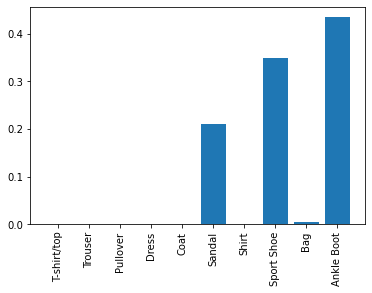

In [86]:
FMNIST_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sport Shoe','Bag','Ankle Boot']
plt.xticks(np.arange(10),labels=FMNIST_labels,rotation='vertical')
plt.bar(np.arange(10), nps)

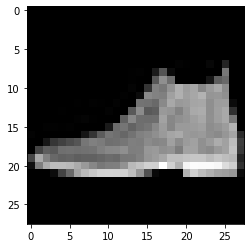

In [87]:
def denormalize(tensor):
  tensor = tensor*0.5 + 0.5
  return tensor
  
img = img.view(28,-1)
img = denormalize(img)
plt.imshow(img,cmap='gray')

## CPU vs GRU
When training models, we often use GPUs. They accelerate existing infrastructure by computing compute-intensive portions of the algorithms.
* CPU: for general-purpose computing
* GPU: for extensive calsulations such as matrix multiplications

### CUDA
CUDA is a parallel computing platform and programming model developed by NVidia.

* at the top of the notebook, specify the CUDA devie
* transfer NN to the GPU
* send all inputs and targets to the GPU

Training: use GPU memory  
Testing: use CPU memory

*Models and testing files should be on the same type of memory*

---

Ways to run the notebook on GPU **in Google Collab**:
* Edit -> Notebook Settings -> Hardware Accelerator -> GPU
* Runtime -> Change runtime type -> GPU


In [88]:
# Setting seeds to try and ensure we have the same results - this is not guaranteed across PyTorch releases.
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import numpy as np
np.random.seed(0)

In [89]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [90]:
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch import nn

mean, std = (0.5,), (0.5,)

# Create a transform and normalise data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                              ])

# Download FMNIST training dataset and load training data
trainset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download FMNIST test dataset and load test data
testset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [91]:
class FMNIST(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,10)
    
  def forward(self, x):
    x = x.view(x.shape[0], -1)
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    
    return x

model = FMNIST()

In [98]:
# move to GPU memory
model.to(device)

FMNIST(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [92]:
from torch import optim
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 3

for i in range(num_epochs):
    cum_loss = 0
    
    for images, labels in trainloader:
        # move to GPU
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        cum_loss += loss.item()
     
    print(f"Training loss: {cum_loss/len(trainloader)}")

Training loss: 1.0338174501843036
Training loss: 0.5608082033360182
Training loss: 0.4914347628699437


In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

# should be on CPU from the beginning
images, labels = next(iter(testloader))

test_image_id = 0 
img = images[test_image_id].view(1, 784) 

# move back to CPU for testing
model.to('cpu')
with torch.no_grad():
    logps = model(img)

In [101]:
ps = torch.exp(logps)
ps

tensor([[1.4896e-06, 5.2015e-07, 8.4381e-06, 8.8204e-07, 5.9689e-06, 1.8997e-01,
         4.8245e-06, 1.6213e-01, 4.4144e-03, 6.4347e-01]])

In [102]:
nps = ps.numpy()[0]
nps

array([1.4896160e-06, 5.2015196e-07, 8.4380827e-06, 8.8204155e-07,
       5.9689005e-06, 1.8996972e-01, 4.8245338e-06, 1.6212720e-01,
       4.4143698e-03, 6.4346659e-01], dtype=float32)

<BarContainer object of 10 artists>

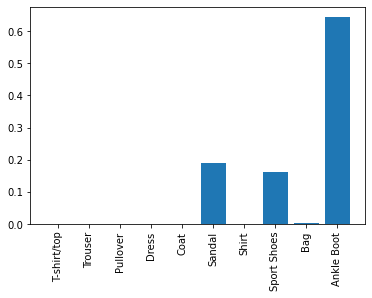

In [103]:
FMNIST_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sport Shoes','Bag','Ankle Boot']
plt.xticks(np.arange(10),labels=FMNIST_labels,rotation='vertical')
plt.bar(np.arange(10), nps)

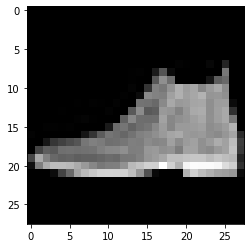

In [104]:
def denormalize(tensor):
  tensor = tensor*0.5 + 0.5
  return tensor
  
img = img.view(28,-1)
img = denormalize(img)
plt.imshow(img,cmap='gray')

## Validation


In [105]:
# Setting seeds to try and ensure we have the same results - this is not guaranteed across PyTorch releases.
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import numpy as np
np.random.seed(0)

In [106]:
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch import nn

mean, std = (0.5,), (0.5,)

# Create a transform and normalise data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                              ])

# Download FMNIST training dataset and load training data
trainset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download FMNIST test dataset and load test data
testset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [107]:
class FMNIST(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,10)
    
  def forward(self, x):
    x = x.view(x.shape[0], -1)
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    
    return x

model = FMNIST()

In [108]:
from torch import optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 3

for i in range(num_epochs):
    cum_loss = 0

    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        cum_loss += loss.item()
     
    print(f"Training loss: {cum_loss/len(trainloader)}")

Training loss: 1.0338174501843036
Training loss: 0.5608082033360182
Training loss: 0.4914347628699437


In [109]:
import matplotlib.pyplot as plt
%matplotlib inline

images, labels = next(iter(testloader))

test_image_id = 0 
img = images[test_image_id].view(1, 784) 

with torch.no_grad():
    logps = model(img)

In [110]:
ps = torch.exp(logps)
ps

tensor([[1.4896e-06, 5.2015e-07, 8.4381e-06, 8.8204e-07, 5.9689e-06, 1.8997e-01,
         4.8245e-06, 1.6213e-01, 4.4144e-03, 6.4347e-01]])

In [111]:
nps = ps.numpy()[0]
nps

array([1.4896160e-06, 5.2015196e-07, 8.4380827e-06, 8.8204155e-07,
       5.9689005e-06, 1.8996972e-01, 4.8245338e-06, 1.6212720e-01,
       4.4143698e-03, 6.4346659e-01], dtype=float32)

<BarContainer object of 10 artists>

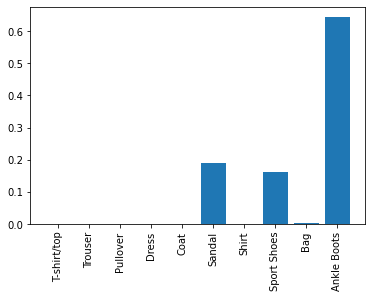

In [112]:
FMNIST_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sport Shoes','Bag','Ankle Boots']
plt.xticks(np.arange(10),labels=FMNIST_labels,rotation='vertical')
plt.bar(np.arange(10), nps)

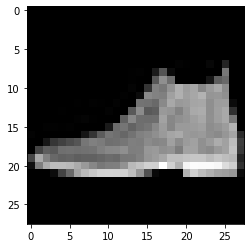

In [113]:
def denormalize(tensor):
  tensor = tensor*0.5 + 0.5
  return tensor
  
img = img.view(28,-1)
img = denormalize(img)
plt.imshow(img,cmap='gray')

In [114]:
# no need to calculate the gradients
with torch.no_grad():
    num_correct = 0
    total = 0

    cnt = 0
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps) # forward pass and the predictions are stored in logps
        print(output)
        cnt+=1
        
        if cnt > 0: # break after one pass
          break
        
# each line is a probability that NN predicts the correct class

tensor([[1.4896e-06, 5.2015e-07, 8.4381e-06, 8.8204e-07, 5.9689e-06, 1.8997e-01,
         4.8245e-06, 1.6213e-01, 4.4144e-03, 6.4347e-01],
        [1.2188e-03, 4.6980e-05, 9.0725e-01, 1.9131e-04, 2.3490e-02, 1.1147e-05,
         6.6653e-02, 9.7439e-09, 1.1407e-03, 5.0562e-07],
        [1.1597e-05, 9.9983e-01, 2.9462e-05, 7.5223e-05, 5.5925e-05, 2.3330e-08,
         1.2206e-07, 4.7394e-07, 4.6876e-09, 9.1409e-09],
        [3.1499e-06, 9.9961e-01, 3.7330e-05, 3.0674e-04, 3.7486e-05, 1.6265e-07,
         9.6245e-08, 1.9846e-06, 9.5102e-09, 5.5129e-08],
        [1.1150e-01, 6.7287e-04, 1.8001e-01, 1.2703e-02, 1.5316e-02, 3.0327e-04,
         6.6901e-01, 1.5421e-06, 1.0464e-02, 1.4989e-05],
        [1.5485e-03, 9.8683e-01, 9.0868e-04, 1.9416e-03, 8.6741e-03, 5.6617e-07,
         9.2075e-05, 4.4322e-06, 1.5532e-06, 2.6432e-07],
        [1.0816e-02, 1.0569e-03, 5.5353e-02, 6.6553e-04, 7.9174e-01, 1.1839e-04,
         1.3836e-01, 7.8579e-07, 1.8907e-03, 1.2058e-06],
        [5.7395e-03, 3.8717

In [115]:
with torch.no_grad():
    num_correct = 0
    total = 0

    #set_trace()
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        
        pred = torch.argmax(output, 1) # getting the value with the highest probability
        total += labels.size(0)


In [116]:
pred, labels

(tensor([3, 3, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5]),
 tensor([3, 2, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5]))

In [117]:
pred == labels

tensor([ True, False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True])

In [118]:
with torch.no_grad():
    num_correct = 0
    total = 0

    #set_trace()
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        
        pred = torch.argmax(output, 1)
        total += labels.size(0)
        num_correct += (pred == labels).sum().item()

    print(f'Accuracy of the model on the 10000 test images: {num_correct * 100 / total}% ')

Accuracy of the model on the 10000 test images: 81.74% 


# PyTorch playground

In [119]:
# Setting seeds to try and ensure we have the same results - this is not guaranteed across PyTorch releases.
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import numpy as np
np.random.seed(0)

In [120]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cpu


In [121]:
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch import nn

mean, std = (0.5,), (0.5,)

# Create a transform and normalise data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                              ])

# Download FMNIST training dataset and load training data
trainset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download FMNIST test dataset and load test data
testset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [122]:
class FMNIST(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,10)
    
  def forward(self, x):
    x = x.view(x.shape[0], -1)
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    
    return x

model = FMNIST()

In [123]:
model.to(device)

FMNIST(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

- The only change we have made to the code is that we are going to track the training loss, the testing loss and the accuracy across the 30 epochs.
- We'll print out the train loss, the test loss and the accuracy after each epoch.
- Because we are running this over 30 epochs this will take a bit longer to run - approx 15 minutes.

In [124]:
from torch import optim
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 30
train_tracker, test_tracker, accuracy_tracker = [], [], []


for i in range(num_epochs):
    cum_loss = 0
    
    for batch, (images, labels) in enumerate(trainloader,1):
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        cum_loss += loss.item()
    
    train_tracker.append(cum_loss/len(trainloader))
    print(f"Epoch({i+1}/{num_epochs}) | Training loss: {cum_loss/len(trainloader)} | ",end='')
    
    test_loss = 0
    num_correct = 0
    total = 0
    
    for batch, (images, labels) in enumerate(testloader,1):
        images = images.to(device)
        labels = labels.to(device)
        
        logps = model(images)
        batch_loss = criterion(logps, labels)        
        test_loss += batch_loss.item()
        
        output = torch.exp(logps)
        pred = torch.argmax(output, 1)
        total += labels.size(0)
        num_correct += (pred == labels).sum().item()
    
    test_tracker.append(test_loss/len(testloader))
    print(f"Test loss: {test_loss/len(testloader)} | ", end='')
    accuracy_tracker.append(num_correct/total)
    print(f'Accuracy : {num_correct/total}')        
print(f'\nNumber correct : {num_correct}, Total : {total}')
print(f'Accuracy of the model after 30 epochs on the 10000 test images: {num_correct * 100 / total}% ')
    
    

Epoch(1/30) | Training loss: 1.0338174501843036 | Test loss: 0.6438944203079127 | Accuracy : 0.7646
Epoch(2/30) | Training loss: 0.5607503942335084 | Test loss: 0.5492629501849983 | Accuracy : 0.8019
Epoch(3/30) | Training loss: 0.491598510475301 | Test loss: 0.5054487923907626 | Accuracy : 0.8153
Epoch(4/30) | Training loss: 0.45538549036232395 | Test loss: 0.4784524805226903 | Accuracy : 0.8272
Epoch(5/30) | Training loss: 0.43235718722600164 | Test loss: 0.4571964134266422 | Accuracy : 0.834
Epoch(6/30) | Training loss: 0.41507624634611073 | Test loss: 0.4552511823405126 | Accuracy : 0.8364
Epoch(7/30) | Training loss: 0.40099091047861934 | Test loss: 0.43269140439428344 | Accuracy : 0.844
Epoch(8/30) | Training loss: 0.388984460915838 | Test loss: 0.4238618138679274 | Accuracy : 0.8462
Epoch(9/30) | Training loss: 0.3774063554145634 | Test loss: 0.42526366224714146 | Accuracy : 0.8494
Epoch(10/30) | Training loss: 0.36864431833089795 | Test loss: 0.40582276111955096 | Accuracy : 0.

- Has the accuracy of the model increased? YES
- Now plot the training loss vs the test loss over 30 epochs.

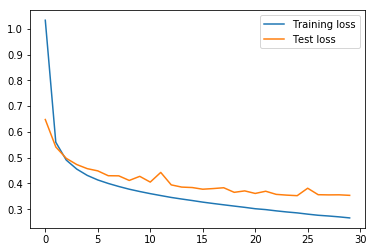

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_tracker, label='Training loss')
plt.plot(test_tracker, label='Test loss')
plt.legend()

- Now add the accuracy to the mix.

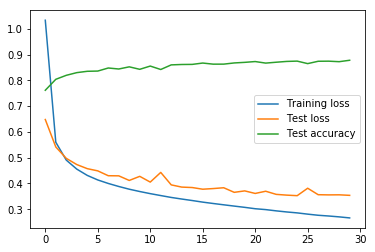

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_tracker, label='Training loss')
plt.plot(test_tracker, label='Test loss')
plt.plot(accuracy_tracker, label='Test accuracy')
plt.legend()

## Further challenges and experiments 
*if I have spare time cause oh god it takes ages to train more complex things...*
- Can you get better accuracy from a model if you :
    - Add more layers? 
    - Change the number of nodes in the layers?
    - Train over fewer/higher epochs?
    
- Can you improve on your results if you add additional layers like [Dropout](https://pytorch.org/docs/master/nn.html#torch.nn.Dropout)